In [146]:
import pandas as pd
import numpy as np
import pandas as pd
from haversine import haversine, Unit
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#### Lectura y analisis del data set

In [128]:
df = pd.read_csv("/workspaces/Emiliano0041-IntroML/data/raw/bank-marketing-campaign-data.csv", sep=';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


- Investigamos sobre el data set con el que trabajaremos

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [130]:
(df == "unknown").sum()



age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

- Eliminamos datos irrelevantes para el estudio

In [131]:
df.drop(["day_of_week", "month", "pdays", "nr.employed", "marital"], axis=1, inplace=True)

df

,age,job,education,default,housing,loan,contact,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,basic.4y,no,no,no,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,high.school,unknown,no,no,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,high.school,no,yes,no,telephone,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,basic.6y,no,no,no,telephone,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,high.school,no,no,yes,telephone,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,professional.course,no,yes,no,cellular,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,yes
41184,46,blue-collar,professional.course,no,no,no,cellular,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,no
41185,56,retired,university.degree,no,yes,no,cellular,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,no
41186,44,technician,professional.course,no,no,no,cellular,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,yes


- Cambiamos los valores de los strings "unknown" a los valores de la moda en los casos de columnas categoricas y a la media en los casos de las columnas numericas.

In [132]:
df = df.replace("unknown", np.nan)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)


(df == "unknown").sum()


/tmp/ipykernel_2285/1893161898.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipykernel_2285/1893161898.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

age               0
job               0
education         0
default           0
housing           0
loan              0
contact           0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
dtype: int64

In [133]:
df.describe()


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.172963,0.081886,93.575664,-40.502600,3.621291
std,10.42125,259.279249,2.770014,0.494901,1.570960,0.578840,4.628198,1.734447
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,98.00000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000


- Con factorize creamos nuevas columnas numericas con los valores de las categoricas

In [134]:
df["job_n"] = pd.factorize(df["job"])[0]
df["education_n"] = pd.factorize(df["education"])[0]
df["poutcome_n"] = pd.factorize(df["poutcome"])[0]
df["y_n"] = pd.factorize(df["y"])[0]
df["default_n"] = pd.factorize(df["default"])[0]
df["loan_n"] = pd.factorize(df["loan"])[0]
df


,age,job,education,default,housing,loan,contact,duration,campaign,previous,...,cons.price.idx,cons.conf.idx,euribor3m,y,job_n,education_n,poutcome_n,y_n,default_n,loan_n
0,56,housemaid,basic.4y,no,no,no,telephone,261,1,0,...,93.994,-36.4,4.857,no,0,0,0,0,0,0
1,57,services,high.school,no,no,no,telephone,149,1,0,...,93.994,-36.4,4.857,no,1,1,0,0,0,0
2,37,services,high.school,no,yes,no,telephone,226,1,0,...,93.994,-36.4,4.857,no,1,1,0,0,0,0
3,40,admin.,basic.6y,no,no,no,telephone,151,1,0,...,93.994,-36.4,4.857,no,2,2,0,0,0,0
4,56,services,high.school,no,no,yes,telephone,307,1,0,...,93.994,-36.4,4.857,no,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,professional.course,no,yes,no,cellular,334,1,0,...,94.767,-50.8,1.028,yes,5,4,0,1,0,0
41184,46,blue-collar,professional.course,no,no,no,cellular,383,1,0,...,94.767,-50.8,1.028,no,3,4,0,0,0,0
41185,56,retired,university.degree,no,yes,no,cellular,189,2,0,...,94.767,-50.8,1.028,no,5,5,0,0,0,0
41186,44,technician,professional.course,no,no,no,cellular,442,1,0,...,94.767,-50.8,1.028,yes,4,4,0,1,0,0


<Axes: >

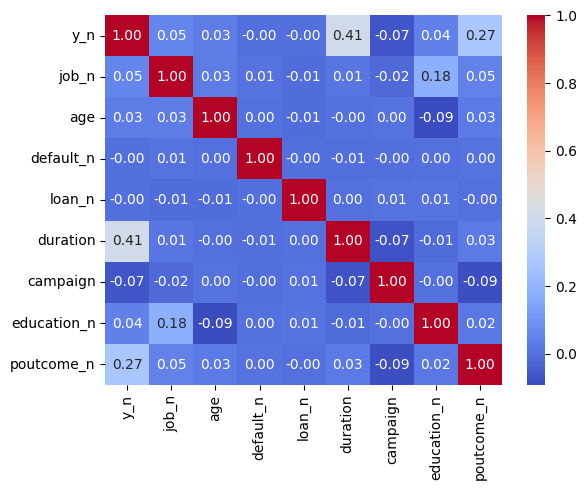

In [135]:
sns.heatmap(df[["y_n", "job_n", "age", "default_n", "loan_n", "duration", "campaign", "education_n", "poutcome_n"]].corr(),
             annot=True, fmt=".2f", cmap="coolwarm")

- Podemos observar la alta correlacion entre la duracion de la llamada y nuestro target.
- Tambien la correlacion, como es logico, entre "job" y "education"
- Ademas observamos que "poutcome" esta correlacionado positivamente con nuestro target.

[Text(0, 0.5, '')]

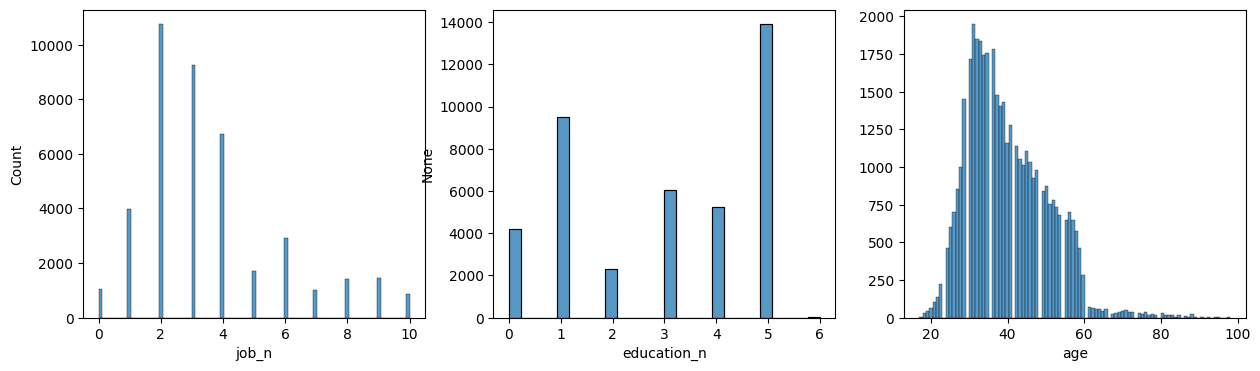

In [136]:
fig, axis = plt.subplots(1, 3, figsize = (15, 4))


sns.histplot(ax=axis[0], data=df, x="job_n")
sns.histplot(ax=axis[1], data=df, x="education_n").set(ylabel="None")
sns.histplot(ax=axis[2], data=df, x="age").set(ylabel=None)


- Graficamos mas de nuestras variables para analizarlas

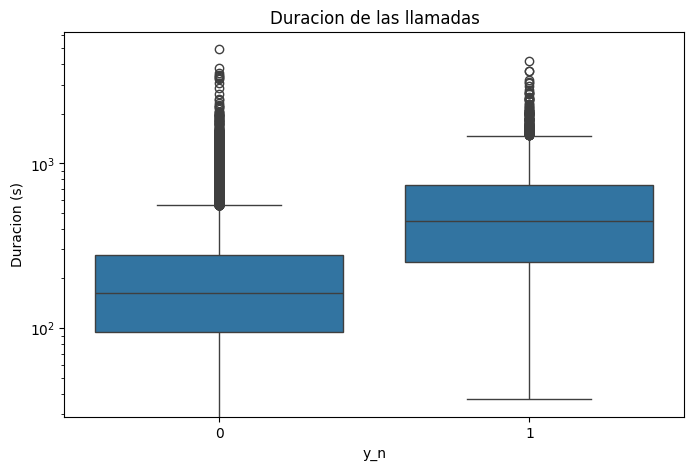

In [137]:
plt.figure(figsize=(8, 5))
sns.boxplot(df, x="y_n", y="duration")
plt.title("Duracion de las llamadas")
plt.ylabel("Duracion (s)")
plt.yscale("log")
plt.show()

- Podemos observar que tenemos un outlier para el caso negativo en nuestro target, que es mas alto que el pico maximo de nuestros positivos. Lo que significa que hubo una llamada muy larga que termino siendo un fracaso.

---

- Ahora eliminare todas las variables que converti anteriormente en numericas para graficarlas y analizarlas. Ya que las voy a codificar.

In [138]:
df.drop(["job_n", "default_n", "loan_n", "education_n", "poutcome_n", "contact"], axis=1, inplace=True)

---

#### Split

In [139]:
X = df.drop(["y", "y_n"], axis=1)
y = df["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=22,
                                                    stratify=y)


#### Encoder

In [140]:
var_cat = ["job", "default", "loan", "education", "poutcome", "housing"]

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Entrenamos al encoder
encoder.fit(X_train[var_cat])

# Aplicamos el encoder al conjunto de entrenamiento
X_train_ohe = encoder.transform(X_train[var_cat])
X_train_ohe = pd.DataFrame(X_train_ohe,
                           index=X_train.index,
                           columns=encoder.get_feature_names_out(var_cat))

# Aplicamos el encoder al conjunto de test
X_test_ohe = encoder.transform(X_test[var_cat])
X_test_ohe = pd.DataFrame(X_test_ohe,
                          index=X_test.index,
                          columns=encoder.get_feature_names_out(var_cat))


> Concatenamos las columnas numericas del X_train y X_test inicial con las columnas categoricas codificadas. Creando un X_train y X_test final.

In [141]:
X_train_num = X_train.drop(columns=var_cat)
X_test_num = X_test.drop(columns=var_cat)

X_train_final = pd.concat([X_train_num, X_train_ohe], axis=1)
X_test_final = pd.concat([X_test_num, X_test_ohe], axis=1)

- Verifico que no haya quedado ningun object

In [142]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32950 entries, 12223 to 21532
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            32950 non-null  int64  
 1   duration                       32950 non-null  int64  
 2   campaign                       32950 non-null  int64  
 3   previous                       32950 non-null  int64  
 4   emp.var.rate                   32950 non-null  float64
 5   cons.price.idx                 32950 non-null  float64
 6   cons.conf.idx                  32950 non-null  float64
 7   euribor3m                      32950 non-null  float64
 8   job_admin.                     32950 non-null  float64
 9   job_blue-collar                32950 non-null  float64
 10  job_entrepreneur               32950 non-null  float64
 11  job_housemaid                  32950 non-null  float64
 12  job_management                 32950 non-null  

#### Escalado

In [143]:
scaler = StandardScaler()
scaler.fit(X_train_final)

X_train_norm = scaler.transform(X_train_final)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train_final.index, columns=X_train_final.columns)

X_test_norm = scaler.transform(X_test_final)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test_final.index, columns=X_test_final.columns)


#### Selector

In [144]:
selector = SelectKBest(score_func=f_classif).fit(X_train_norm, y_train)
selected_cols = X_train_norm.columns[selector.get_support()]

X_train_sel = pd.DataFrame(selector.transform(X_train_norm), columns=selected_cols)
X_test_sel = pd.DataFrame(selector.transform(X_test_norm), columns=selected_cols)

X_train_sel.head()

,duration,previous,emp.var.rate,cons.price.idx,euribor3m,job_blue-collar,job_retired,job_student,poutcome_nonexistent,poutcome_success
0,0.455291,-0.347001,0.837743,0.589910,0.774447,-0.538593,-0.209075,-0.146465,0.396480,-0.186103
1,-0.684768,-0.347001,-1.897752,-1.060296,-1.360712,-0.538593,-0.209075,-0.146465,0.396480,-0.186103
2,-0.427963,-0.347001,0.837743,-0.229145,0.773294,-0.538593,-0.209075,-0.146465,0.396480,-0.186103
3,0.572021,3.668337,-1.197974,-1.181253,-1.339384,-0.538593,-0.209075,-0.146465,-2.522198,-0.186103
4,-0.283996,1.660668,-1.134358,0.778258,-1.577456,-0.538593,4.782971,-0.146465,-2.522198,-0.186103


#### Creacion del modelo y predicciones.

In [151]:
model_lr = LogisticRegression(max_iter=1000, solver="liblinear", class_weight="balanced")
model_lr.fit(X_train_final, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [152]:
y_pred = model_lr.predict(X_test_final)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(8238,))

In [153]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8495994173343044

In [154]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7310
           1       0.42      0.84      0.56       928

    accuracy                           0.85      8238
   macro avg       0.70      0.85      0.73      8238
weighted avg       0.91      0.85      0.87      8238



- Aqui estoy priorizando encontrar a los que dirían SÍ, incluso si eso significa clasificar algunos NO como SÍ por error.

- Esto tiene sentido en marketing bancario, donde es preferible contactar a un cliente que probablemente acepte, en lugar de perder una oportunidad de conversión.
